# Proyek Analisis Data: Nama dataset
- Nama: Fajrul Iman Giat Koentjoro
- Email: fajrul.10.9e@gmail.com
- Id Dicoding: fajrul_koentjoro

## Menentukan Pertanyaan Bisnis

- Bagimana pengaruh musim (season) terhadap jumlah penyewaan (cnt) sepeda?
- Bagaimana pengaruh faktor cuaca (weathersit) terhadap rata-rata jumlah penyewaan sepeda (cnt) pada setiap musim (season)?
- Bagaimana korelasi antara faktor alam (weathersit, temp, atemp, hum, dan windspeed) dengan jumlah penyewaan sepeda (cnt)?

## Menyaipkan semua library yang dibuthkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Pada tahap ini dilakukan pengumpulan data yang didapat dari link yang sudah disediakan yaitu https://drive.google.com/file/d/1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ/view. Kemudian melakukan pemuatan/load data ke google colab. Dataset csv didownload dari link kemudian diekstrak dan diupload ke google colab untuk kemudian dapat di load mengunakan pd.read_csv(). Sebenarnya bisa mengunakan !wget dan zipfile namun saya memilih cara yang paling simple

In [2]:
#Load hour.csv
hour_df = pd.read_csv('/content/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
#Load day.csv
day_df = pd.read_csv('/content/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Kedua data diatas tidak memiliki berbedaan insight yang signifikan. Yang membedakan keduanya hanyalah format record data saja, dimana hour_df data direcord perjam (by-hour) sedangkan day_df data direcord perhari (by-day). Dimana data day_df didapat dari rata-rata (mean), penjumlahan (sum) dan atau akumulasi dari data hour_df

### Assessing Data

Pada tahap ini dilakukan assessing data, apakah data hour_df dan day_df memiliki anomaly pada datanya seperti missing value (NaN/Null), duplicate data dan dtype yang salah

In [4]:
#Cek apakah ada kejangalan pada dtype data hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
#Cek duplikasi pad data hour_df
print("Jumlah duplikasi pada data hour_df: ", hour_df.duplicated().sum())

Jumlah duplikasi pada data hour_df:  0


In [6]:
#Cek missing value (NaN/Null) pada data hour_df
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
#Cek apakah ada kejangalan pada dtype data day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
#Cek duplikasi pad data hour_df
print("Jumlah duplikasi pada data hour_df: ", hour_df.duplicated().sum())

Jumlah duplikasi pada data hour_df:  0


In [9]:
#Cek missing value (NaN/Null) pada data hour_df
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Kesimpulan: hour_df dan day_df hanya perlu dilakukan konversi dtype dari kolom dteday dari object/string menjadi datetime

### Cleaning Data

Pada tahap ini dilakukan eksekusi pembersihan data, dimana pada kasus ini hanya dilakukan konversi dtype dari kolom dteday menjadi datetime mengunakan perintah pd.to_datetime()

In [10]:
#Mengubah dtype kolom dteday menjadi datetime
hour_df["dteday"] = pd.to_datetime(hour_df.dteday)
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [11]:
#Mengubah dtype kolom dteday menjadi datetime
day_df["dteday"] = pd.to_datetime(day_df.dteday)
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

### Explore hour_df

Pada tahap ini akan dicoba mengali beberapa insight dari data hour_df

In [12]:
#Menampilkan sample data hour_df
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [13]:
#Menampilkan value statistika deskriptif dari hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak banyak insight yang bisa didapat dari statistika deskriptif diatas. Insight penting yang bisa didapat adalah rata-rata total rental dalam satu jam (cnt) adalah 189/190 rental. Sedangkan nilai minimal total rental dalam satu jam adalah 1 rental dan nilai maksimal total rental dalam satu jama adalah 977 rental.

In [14]:
#Melihat data dengan total rental tertinggi
hour_df[hour_df['cnt'] == hour_df['cnt'].max()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14773,14774,2012-09-12,3,1,9,18,0,3,1,1,0.66,0.6212,0.44,0.2537,91,886,977


Total penyewaan tertinggi dalam satu jam terjadi pada tanggal 2012-09-12 dihari Rabu saat hari kerja di jam 18

In [15]:
#Melihat data dengan total rental terrendah
hour_df[hour_df['cnt'] == hour_df['cnt'].min()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
30,31,2011-01-02,1,0,1,7,0,0,0,2,0.40,0.4091,0.76,0.1940,0,1,1
49,50,2011-01-03,1,0,1,4,0,1,1,1,0.16,0.1364,0.47,0.3881,0,1,1
71,72,2011-01-04,1,0,1,2,0,2,1,1,0.14,0.1515,0.63,0.1343,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16879,16880,2012-12-11,4,1,12,2,0,2,1,2,0.40,0.4091,0.66,0.3284,0,1,1
17215,17216,2012-12-25,1,1,12,4,1,2,0,2,0.24,0.2576,0.87,0.0896,0,1,1
17237,17238,2012-12-26,1,1,12,2,0,3,1,2,0.26,0.2273,0.65,0.2985,0,1,1
17262,17263,2012-12-27,1,1,12,3,0,4,1,2,0.24,0.2273,0.87,0.2239,0,1,1


Dapat diketahui bahwa jumlah rental terendah terjadi pada waktu pagi hari dari jam 1 - 7 pagi

In [16]:
#Melihat tren rental per-tanggal baik casual, registered maupun total
daily_rental = hour_df.groupby(by='dteday').agg({
    'casual':'sum',
    'registered':'sum',
    'cnt':'sum'
})
daily_rental

,casual,registered,cnt
dteday,,,
2011-01-01,331,654,985
2011-01-02,131,670,801
2011-01-03,120,1229,1349
2011-01-04,108,1454,1562
2011-01-05,82,1518,1600
...,...,...,...
2012-12-27,247,1867,2114
2012-12-28,644,2451,3095
2012-12-29,159,1182,1341


In [17]:
#Melihat jam dengan rata-rata jumlah rental tertinggi
hour_df.groupby(by='hr').agg({
    'casual':'mean',
    'registered':'mean',
    'cnt':'mean'
})

,casual,registered,cnt
hr,,,
0,10.158402,43.739669,53.898072
1,6.504144,26.871547,33.375691
2,4.772028,18.097902,22.869930
3,2.715925,9.011478,11.727403
4,1.253945,5.098996,6.352941
5,1.411437,18.478382,19.889819
6,4.161379,71.882759,76.044138
7,11.055021,201.009629,212.064649
8,21.679505,337.331499,359.011004


In [18]:
#Melihat perbedaan jam dengan rata-rata jumlah rental tertinggi antara hari kerja dan tidak
hour_df.groupby(by=['hr', 'workingday']).agg({
    'casual':'mean',
    'registered':'mean',
    'cnt':'mean'
})

casual  registered         cnt
hr workingday                                    
0  0            16.647826   74.152174   90.800000
   1             7.149194   29.637097   36.786290
1  0            12.504348   57.004348   69.508696
   1             3.710526   12.842105   16.552632
2  0            10.399123   42.771930   53.171053
   1             2.137577    6.546201    8.683778
3  0             6.453744   19.321586   25.775330
   1             0.910638    4.031915    4.942553
4  0             2.264317    6.000000    8.264317
   1             0.765957    4.663830    5.429787
5  0             1.725225    6.963964    8.689189
   1             1.270707   23.642424   24.913131
6  0             3.820961   14.921397   18.742358
   1             4.318548   98.181452  102.500000
7  0             8.606061   34.800866   43.406926
   1            12.195565  278.417339  290.612903
8  0            20.424242   85.229437  105.653680
   1            22.264113  454.741935  477.006048
9  0            45.017316  126.606061  171.623377
   1            24.312500  217.205645  241.518145
10 0            79.268398  176.640693  255.909091
   1            31.205645  104.161290  135.366935
11 0           106.653680  208.662338  315.316017
   1            37.598790  120.631048  158.229839
12 0           126.246753  240.012987  366.259740
   1            41.358149  159.462777  200.820926
13 0           136.424242  236.307359  372.731602
   1            42.568273  155.861446  198.429719
14 0           139.593074  225.051948  364.645022
   1            45.869478  137.702811  183.572289
15 0           136.502165  222.311688  358.813853
   1            46.333333  154.997992  201.331325
16 0           128.614719  224.112554  352.727273
   1            48.344689  244.777555  293.122244
17 0           111.813853  211.735931  323.549784
   1            56.895792  468.394790  525.290581
18 0            84.221739  196.834783  281.056522
   1            50.451807  441.775100  492.226908
19 0            65.547826  166.126087  231.673913
   1            41.022088  307.379518  348.401606
20 0            46.765217  127.973913  174.739130
   1            31.369478  218.349398  249.718876
21 0            36.147826  105.913043  142.060870
   1            24.610442  161.676707  186.287149
22 0            28.056522   88.004348  116.060870
   1            19.572289  118.817269  138.389558
23 0            19.139130   66.791304   85.930435
   1            13.379518   75.329317   88.708835

In [19]:
#Pengaruh weathersit terhadap rata-rata jumlah rental (cnt) pada setiap musim (season)
weathersit_gb = hour_df.groupby(by=['season', 'weathersit']).agg({
    'cnt':'mean'
})
weathersit_gb

cnt
season weathersit            
1      1           122.055535
       2           103.074689
       3            58.650407
       4            74.333333
2      1           232.410983
       2           181.261364
       3           115.179803
3      1           244.494207
       2           224.848997
       3           171.955390
4      1           209.463779
       2           201.483974
       3           116.453333

Pada setiap season/musim kondisi weathersit 1 cenderung lebih banyak penyewa dibanding keadaan weathersit lain. Kemudian disusul kondisi weathersit 2 dan kondisi weathersit dengan total rent terkecil adalah kondisi 4

### Explore day_df

In [20]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [21]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [22]:
#Melihat tren musim terhadap jumlah rental
season_cnt_df = day_df[['season', 'cnt']]
season_cnt_df

,season,cnt
0,1,985
1,1,801
2,1,1349
3,1,1562
4,1,1600
...,...,...
726,1,2114
727,1,3095
728,1,1341
729,1,1796


In [23]:
#Melihat pengaruh musim dengan jumlah rental
season_gb = day_df.groupby(by=['season']).agg({
    'cnt':'sum',
})
#season_gb.reset_index(inplace=True)
season_gb

,cnt
season,
1,471348
2,918589
3,1061129
4,841613


In [24]:
#Melihat perubahan jumlah rental pada tahun 2011 dan 2011 disetiap musim
season_year_gb = day_df.groupby(by=['season', 'yr']).agg({
    'cnt':'sum',
})
season_year_gb

cnt
season yr        
1      0   150000
       1   321348
2      0   347316
       1   571273
3      0   419650
       1   641479
4      0   326137
       1   515476

Diketahui bahwa jumlah rental bertambah dari tahun 2011-2012. Musim dengan jumlah rental tertinggi adalah musim 3 baik pada tahun 2011 maupun 2012

In [25]:
"""Melihat korelasi faktor alam ('weathersit', 'temp', 'atemp',
'hum', 'windspeed') terhadap jumlah rental (cnt)"""

kolom_faktor_alam = ['weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
faktor_alam_df = day_df[kolom_faktor_alam]
correlation = faktor_alam_df.corr()
correlation

,weathersit,temp,atemp,hum,windspeed,cnt
weathersit,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.297391
temp,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.627494
atemp,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.631066
hum,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.100659
windspeed,0.039511,-0.157944,-0.183643,-0.248489,1.000000,-0.234545
cnt,-0.297391,0.627494,0.631066,-0.100659,-0.234545,1.000000


Diketahui bahwa weathersit, humidity dan windspeed memiliki korelasi negatif dengan jumlah rental (cnt) sebesar -0.29, -0.1 dan -0.23. Namun nilai korelasi yang terlalu kecil tidak dapat berpengaruh besar dan menunjukan bahwa ada variabel lain yang berpengaruh juga terhadap cnt.

Disisilain faktor temperatur (temp) dan feeling temperature (atemp) memiliki korelasi positif yang cukup besar yaitu 0.62 dan 0.63. Hal ini menunjukaan bahwa ada keterkaitan yang cukup erat antara perubahan suhu dengan jumlah rental (cnt)

In [26]:
#Melihat tren pengaruh temperatur (temp) terhadap jumlah rental (cnt)
temp_df = day_df[['temp', 'cnt']]
temp_df['temp'] = temp_df['temp']*41
temp_df.head()

<ipython-input-26-489ea47e1075>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['temp'] = temp_df['temp']*41


,temp,cnt
0,14.110847,985
1,14.902598,801
2,8.050924,1349
3,8.200000,1562
4,9.305237,1600


In [27]:
#Melihat tren pengaruh feeling temperatur (atemp) terhadap jumlah rental (cnt)
atemp_df = day_df[['atemp', 'cnt']]
atemp_df['atemp'] = atemp_df['atemp']*50
atemp_df.head()

<ipython-input-27-c279c7bed7d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atemp_df['atemp'] = atemp_df['atemp']*50


,atemp,cnt
0,18.18125,985
1,17.68695,801
2,9.47025,1349
3,10.60610,1562
4,11.46350,1600


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagimana pengaruh musim (season) terhadap jumlah penyewaan (cnt) sepeda?

season = (1: spring, 2: summer, 3: fall, 4: winter)

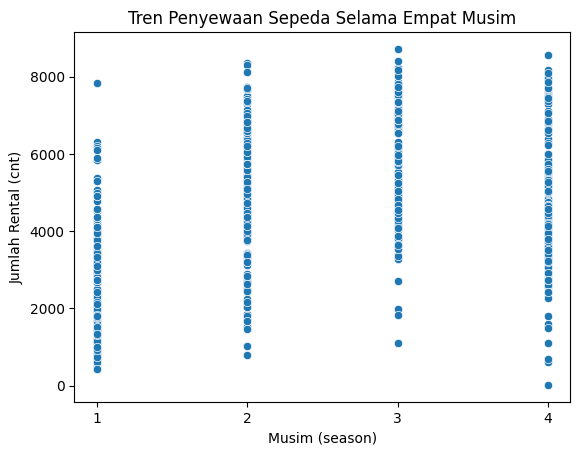

In [28]:
#Melihat tren season terhadap cnt mengunakan scatterplot
sns.scatterplot(x='season', y='cnt', data=season_cnt_df)

# Menampilkan plot
plt.xticks(season_cnt_df['season'].unique())
plt.xlabel('Musim (season)')
plt.ylabel('Jumlah Rental (cnt)')
plt.title('Tren Penyewaan Sepeda Selama Empat Musim', loc = 'center')
plt.show()

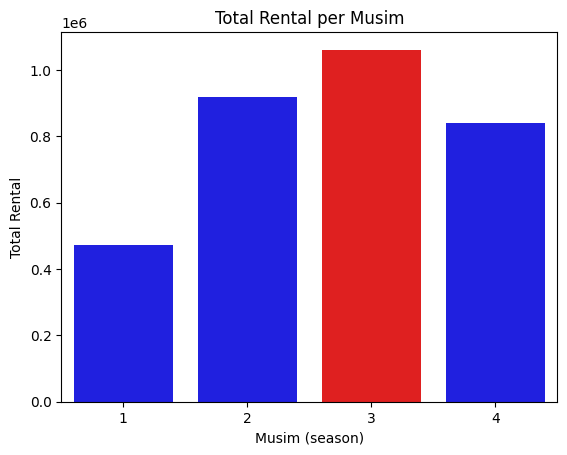

In [29]:
#Total rental pada setiap musim
colors = ['b' if x < max(season_gb.cnt) else 'r' for x in season_gb.cnt]
sns.barplot(data=season_gb.reset_index(), x='season', y='cnt', palette=colors)
plt.xlabel('Musim (season)')
plt.ylabel('Total Rental')
plt.title('Total Rental per Musim')
plt.show()

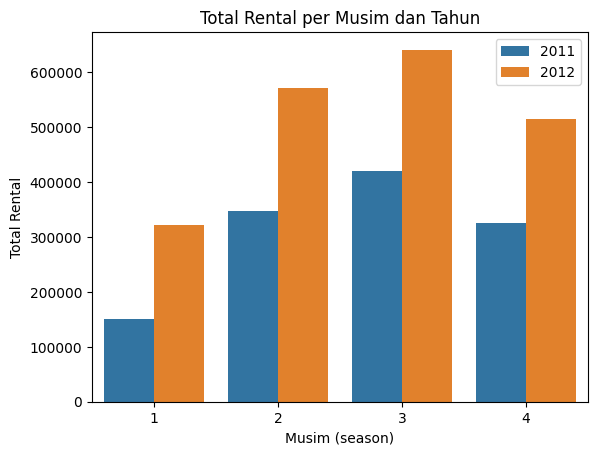

In [30]:
#Total rental per musim dan tahun
plot = sns.barplot(x='season', y='cnt', hue='yr', data=season_year_gb.reset_index())
handles, labels = plot.get_legend_handles_labels()
labels = ['2011', '2012']
plt.legend(handles, labels)
plt.xlabel('Musim (season)')
plt.ylabel('Total Rental')
plt.title('Total Rental per Musim dan Tahun')
plt.show()

Ketika Grafik diatas menunjukkan tren penyewaan sepeda selama empat musim. Sumbu x mewakili musim dan sumbu y mewakili jumlah penyewaan sepeda. Dari ketiga grafik tersebut didapati bahwa Jumlah rental baik total maupun rata-rata tertinggi terjadi pada musim ke-3 sedangkan jumlah rental terendah terjadi pada musim ke-1. Hal ini terjadi baik ditahun 2011 dan 2011. Selain itu juga didapati informasi bahwa jumlah rental setiap tahun per-musim semuanya mengalami kenaikan.

### Pertanyaan 2: Bagaimana pengaruh faktor cuaca (weathersit) terhadap rata-rata jumlah penyewaan sepeda (cnt) pada setiap musim (season)?

- season = 1: spring, 2: summer, 3: fall, 4: winter
- weathersit =
    1.   Clear, Few clouds, Partly cloudy, Partly cloudy
    2.   Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3.   Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4.   Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog



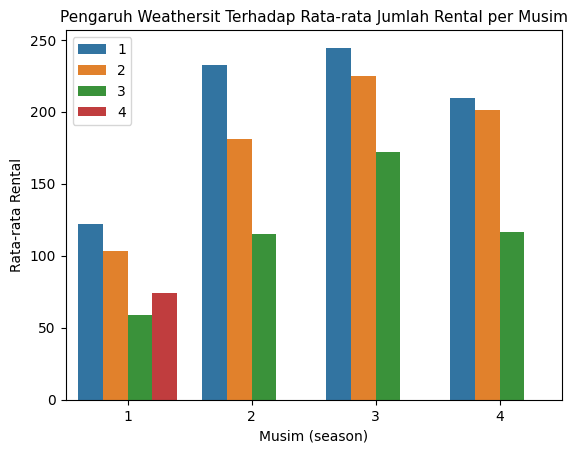

In [31]:
#Pengaruh weathersit terhadap rata-rata jumlah rental per musim
plot = sns.barplot(x='season', y='cnt', hue='weathersit', data=weathersit_gb.reset_index())
handles, labels = plot.get_legend_handles_labels()
plt.legend(handles, labels)
plt.xlabel('Musim (season)')
plt.ylabel('Rata-rata Rental')
plt.title('Pengaruh Weathersit Terhadap Rata-rata Jumlah Rental per Musim', fontsize=11)
plt.show()

Grafik ini menunjukkan rata-rata jumlah penyewaan per musim untuk berbagai kondisi cuaca. Grafik ini adalah grafik batang dengan empat batang untuk setiap musim. Sumbu x diberi label “Musim” dan sumbu y diberi label “Rata-rata Rental”. Batang-batang diberi kode warna sesuai dengan kondisi cuaca: biru untuk 1, oranye untuk 2, hijau untuk 3, dan merah untuk 4. Jumlah rata-rata penyewaan tertinggi ada di musim 3 untuk kondisi cuaca 1. Jumlah rata-rata penyewaan terendah ada di musim 1 untuk kondisi cuaca 3. Selain itu juga diketahui bahwa kondisi cuaca 1 selalu menjadi tertinggi untuk setiap musim dan kondisi cuaca 3 selalu menjadi terendah disetiap musim. Sedangkan kondisi cuaca ke-4 hanya muncul pada musim 1 sedangkan pada musim 2, 3, 4 tidak muncul.

### Pertanyaan 3: Bagaimana korelasi antara faktor alam (weathersit, temp, atemp, hum, dan windspeed) dengan jumlah penyewaan sepeda (cnt)?

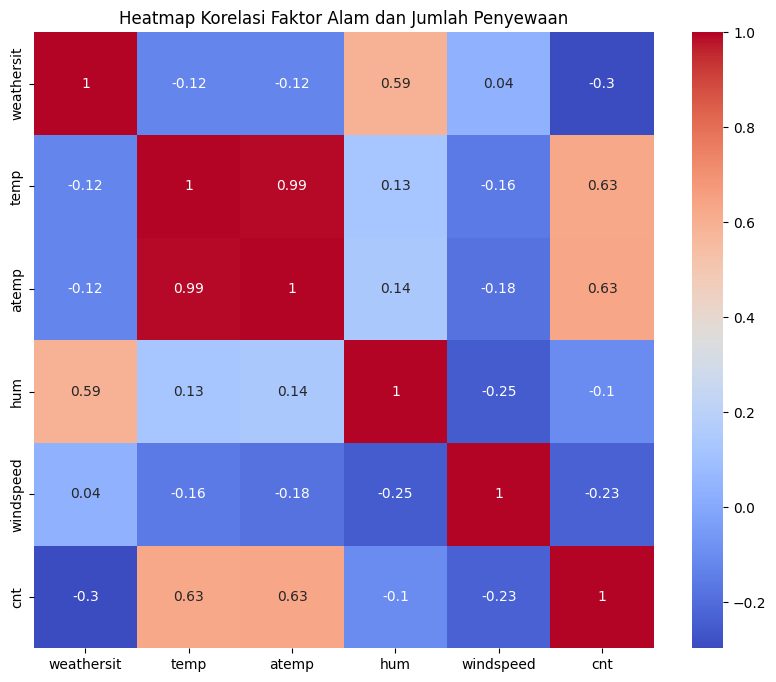

In [32]:
# Korelasi faktor alam terhadap jumlah rental
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Faktor Alam dan Jumlah Penyewaan')
plt.show()

Dari heatmap diatas didapati informasi mengenai korelasi antara faktor alam terhadap jumlah rental (cnt). Dimana faktor suhu (temp) dan suhu yang dirasakan (atemp) memiliki korelasi positif yang cukup tinggi terhadap cnt yaitu sebesar 0.63. Hal ini menunjukan adanya korelasi atau hubungan yang cukup erat antara temp dan atemp dengan cnt, dimana semakin naik nilai temp atau atemp maka jumlah rental (cnt) juga mengalami kenaikan. Selain itu juga diketahui bahwa weathersit memiliki korelasi negatif terhadap cnt sebesar -0.3, hal ini menandakan bahwa semakin besar nilai kondisi weathersit maka cnt semakin turun. Namun nilai korelasi yang cukup kecil tersebut diperkirakan bahwa pengaruhnya terhadap cnt tidak terlalu besar. Hal ini juga selaras dengan hasil dari pertanyaan 2, dimana weathersit kondisi 1 selalu menjadi tertinggi disetiap musim dan weathersit kondisi 3 selalu menjadi terendah pada setiap musim dan weathersit kondisi 4 hanya muncul pada musim 1. Selain itu faktor humidity (hum) dan windspeed juga memiliki korelasi negatif namun nilainya yang sangat kecil yaitu -0.1 dan -0.23 menadakan pengaruhnya sangat kecil dan dapat diabaikan

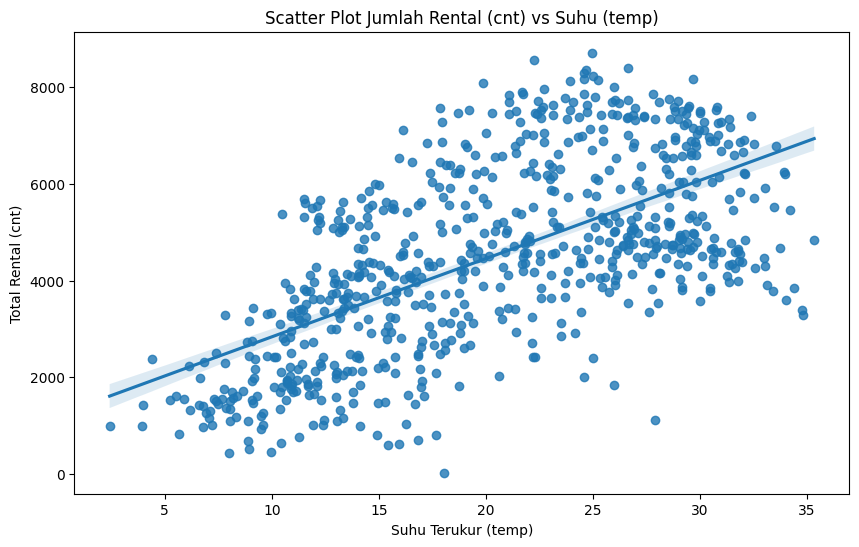

In [33]:
#Tren pengaruh nilai temp (temperatur) terhadap jumlah rental
plt.figure(figsize=(10, 6))
sns.regplot(x='temp', y='cnt', data=temp_df)
plt.ylabel('Total Rental (cnt)')
plt.xlabel('Suhu Terukur (temp)')
plt.title('Scatter Plot Jumlah Rental (cnt) vs Suhu (temp)')
plt.show()

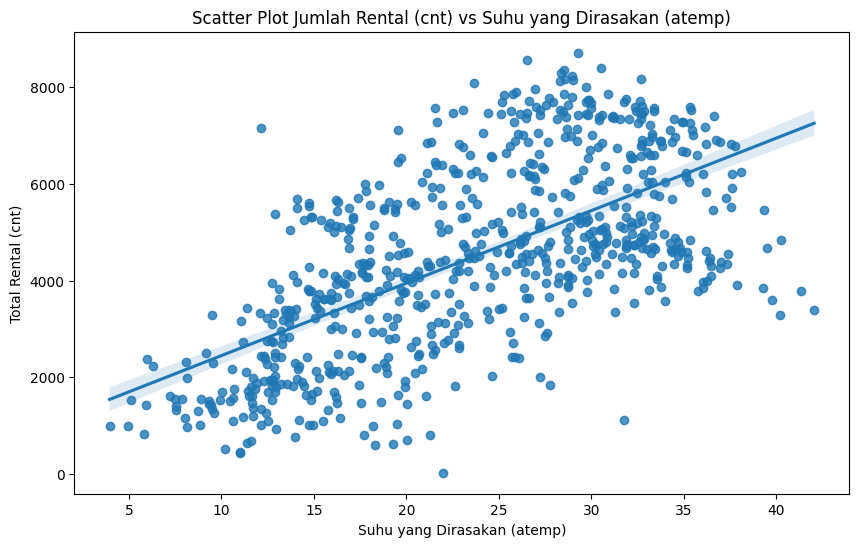

In [34]:
#Tren pengaruh nilai atemp (feeling temperatur) terhadap jumlah rental
plt.figure(figsize=(10, 6))
sns.regplot(x='atemp', y='cnt', data=atemp_df)
plt.ylabel('Total Rental (cnt)')
plt.xlabel('Suhu yang Dirasakan (atemp)')
plt.title('Scatter Plot Jumlah Rental (cnt) vs Suhu yang Dirasakan (atemp)')
plt.show()

Berdasarkan dua scatterplot diatas yaitu antara temp vs cnt dan atemp vs cnt, diketahui bahwa pola yang ada cukup mirip. Hal ini mungkin dikarenakan keduanya memiliki karakteristik data yang sama karena sama sama berbicara tentang suhu yang membedakan hanyalah jika temp adalah suhu terukur dan atemp adalah suhu yang dirasakan sehingga tidak akan memiliki perbedaan yang signifikan. Selain itu diketahui bahwa memang benar jika temp dan atemp memiliki korelasi yang cukup baik dengan cnt. Hal ini dapat dilihar pada grafik tersebut yang memperlihatkan bahwa keduanya memiliki tren yang cenderung naik pada setiap kenaikan nilai temp dan atemp. Hal itu juga dapat dilihat pada garis regresi yang ada menunjukan tren kenaikan. Selain itu juga peta confidence levelnya juga cukup tipis yang menandakan bahwa nilai confidence level yang tinggi.

## Conclusion

- Conclution pertanyaan 1:

In [35]:
"""Dari ketiga grafik tersebut dapat disimpulkan bahwa tren penyewaan sepeda
mengalami fluktuasi sepanjang empat musim. Jumlah penyewaan sepeda, baik total
maupun rata-rata, mencapai puncaknya pada musim ketiga (fall), sementara jumlah
terendah terjadi pada musim pertama (spring). Pola ini diamati baik pada tahun
2011 dan 2012. Selain itu, jumlah penyewaan sepeda setiap tahun untuk setiap
musim mengalami peningkatan. Ini menunjukkan bahwa popularitas penyewaan sepeda
meningkat dari tahun ke tahun, terlepas dari musim."""

'Dari ketiga grafik tersebut dapat disimpulkan bahwa tren penyewaan sepeda \nmengalami fluktuasi sepanjang empat musim. Jumlah penyewaan sepeda, baik total \nmaupun rata-rata, mencapai puncaknya pada musim ketiga (fall), sementara jumlah \nterendah terjadi pada musim pertama (spring). Pola ini diamati baik pada tahun \n2011 dan 2012. Selain itu, jumlah penyewaan sepeda setiap tahun untuk setiap \nmusim mengalami peningkatan. Ini menunjukkan bahwa popularitas penyewaan sepeda \nmeningkat dari tahun ke tahun, terlepas dari musim.'

- conclution pertanyaan 2:

In [36]:
"""Berdasarkan grafik tersebut dapat disimpulkan bahwa rata-rata jumlah
penyewaan sepeda berfluktuasi berdasarkan musim dan kondisi cuaca. Jumlah
penyewaan terendah terjadi pada musim semi (season 1) saat kondisi cuaca 3,
yaitu saat terjadi Salju Ringan, Hujan Ringan + Petir + Awan Tersebar, atau
Hujan Ringan + Awan Tersebar. Sementara itu, jumlah penyewaan tertinggi terjadi
pada musim gugur (season 3) saat kondisi cuaca 1, yaitu saat cuaca Cerah,
Sedikit Awan, Sebagian Berawan, atau Sebagian Berawan. Selain itu, kondisi cuaca
1 selalu memiliki jumlah penyewaan tertinggi untuk setiap musim, sementara
kondisi cuaca 3 selalu memiliki jumlah penyewaan terendah di setiap musim.
Kondisi cuaca 4, yaitu saat terjadi Hujan Lebat + Es Peluru + Petir + Kabut,
atau Salju + Kabut, hanya muncul pada musim semi dan tidak muncul pada musim
lainnya. Kesimpulannya, tren penyewaan sepeda sangat dipengaruhi oleh musim dan
kondisi cuaca."""

'Berdasarkan grafik tersebut dapat disimpulkan bahwa rata-rata jumlah \npenyewaan sepeda berfluktuasi berdasarkan musim dan kondisi cuaca. Jumlah \npenyewaan terendah terjadi pada musim semi (season 1) saat kondisi cuaca 3, \nyaitu saat terjadi Salju Ringan, Hujan Ringan + Petir + Awan Tersebar, atau \nHujan Ringan + Awan Tersebar. Sementara itu, jumlah penyewaan tertinggi terjadi \npada musim gugur (season 3) saat kondisi cuaca 1, yaitu saat cuaca Cerah, \nSedikit Awan, Sebagian Berawan, atau Sebagian Berawan. Selain itu, kondisi cuaca \n1 selalu memiliki jumlah penyewaan tertinggi untuk setiap musim, sementara \nkondisi cuaca 3 selalu memiliki jumlah penyewaan terendah di setiap musim. \nKondisi cuaca 4, yaitu saat terjadi Hujan Lebat + Es Peluru + Petir + Kabut, \natau Salju + Kabut, hanya muncul pada musim semi dan tidak muncul pada musim \nlainnya. Kesimpulannya, tren penyewaan sepeda sangat dipengaruhi oleh musim dan \nkondisi cuaca.'

- conclution pertanyaan 3:

In [37]:
"""Berdasarkan heatmap dan scatterplot yang disajikan, dapat disimpulkan bahwa
ada hubungan yang signifikan antara suhu (temp) dan suhu yang dirasakan (atemp)
dengan jumlah penyewaan (cnt). Keduanya memiliki korelasi positif sebesar 0.63,
yang berarti bahwa semakin tinggi suhu atau suhu yang dirasakan, jumlah
penyewaan cenderung meningkat. Namun tentu saja pada suhu yang cukup tinggi
jumlah penyewaan kembali menurun, hal ini terjadi pada temp kisaran 33 keatas
dan pada atemp kisaran 38 keatas.

Sedangkan, kondisi cuaca (weathersit) memiliki korelasi negatif dengan jumlah
penyewaan sebesar -0.3, yang berarti bahwa semakin buruk kondisi cuaca, jumlah
penyewaan cenderung menurun. Meski demikian, pengaruh kondisi cuaca terhadap
jumlah penyewaan tidak terlalu besar, karena nilai korelasinya relatif kecil.

Faktor lain seperti kelembaban (hum) dan kecepatan angin (windspeed) juga
memiliki korelasi negatif dengan jumlah penyewaan, tetapi nilai korelasinya
sangat kecil (-0.1 dan -0.23), sehingga pengaruhnya bisa diabaikan.

Dari scatterplot antara temp vs cnt dan atemp vs cnt, pola yang ditunjukkan
cukup mirip, yang mungkin disebabkan oleh karakteristik data yang sama antara
temp dan atemp. Keduanya menunjukkan tren yang cenderung naik seiring dengan
kenaikan nilai temp dan atemp, yang ditunjukkan oleh garis regresi dan peta
tingkat kepercayaan (confidence level) yang cukup tipis, menandakan tingkat
kepercayaan yang tinggi.

Jadi, kesimpulannya adalah suhu dan suhu yang dirasakan memiliki pengaruh yang
signifikan terhadap jumlah penyewaan, sementara kondisi cuaca memiliki pengaruh
yang lebih kecil, dan kelembaban dan kecepatan angin memiliki pengaruh yang
sangat kecil dan bisa diabaikan."""

'Berdasarkan heatmap dan scatterplot yang disajikan, dapat disimpulkan bahwa \nada hubungan yang signifikan antara suhu (temp) dan suhu yang dirasakan (atemp) \ndengan jumlah penyewaan (cnt). Keduanya memiliki korelasi positif sebesar 0.63, \nyang berarti bahwa semakin tinggi suhu atau suhu yang dirasakan, jumlah \npenyewaan cenderung meningkat. Namun tentu saja pada suhu yang cukup tinggi \njumlah penyewaan kembali menurun, hal ini terjadi pada temp kisaran 33 keatas \ndan pada atemp kisaran 38 keatas.\n\nSedangkan, kondisi cuaca (weathersit) memiliki korelasi negatif dengan jumlah \npenyewaan sebesar -0.3, yang berarti bahwa semakin buruk kondisi cuaca, jumlah \npenyewaan cenderung menurun. Meski demikian, pengaruh kondisi cuaca terhadap \njumlah penyewaan tidak terlalu besar, karena nilai korelasinya relatif kecil.\n\nFaktor lain seperti kelembaban (hum) dan kecepatan angin (windspeed) juga \nmemiliki korelasi negatif dengan jumlah penyewaan, tetapi nilai korelasinya \nsangat kecil 